In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [4]:
test = pd.read_csv('test.csv')
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# In train data we have null values in [LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,
# BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,
# Fence,MiscFeature]

In [8]:
test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
# In test data we have null values in [LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,
# BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,
# Fence,MiscFeature]

In [10]:
x = train.nunique()
x                   # As we are not able to see all the columns we will use 'x.head' and 'x.tail'

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [11]:
# So we can say that all the columns except 'Id' are categorical in nature.
# The target i.e Sale Price is also categorical.

In [12]:
test.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64

## Corelation Matrix for Feature Selection

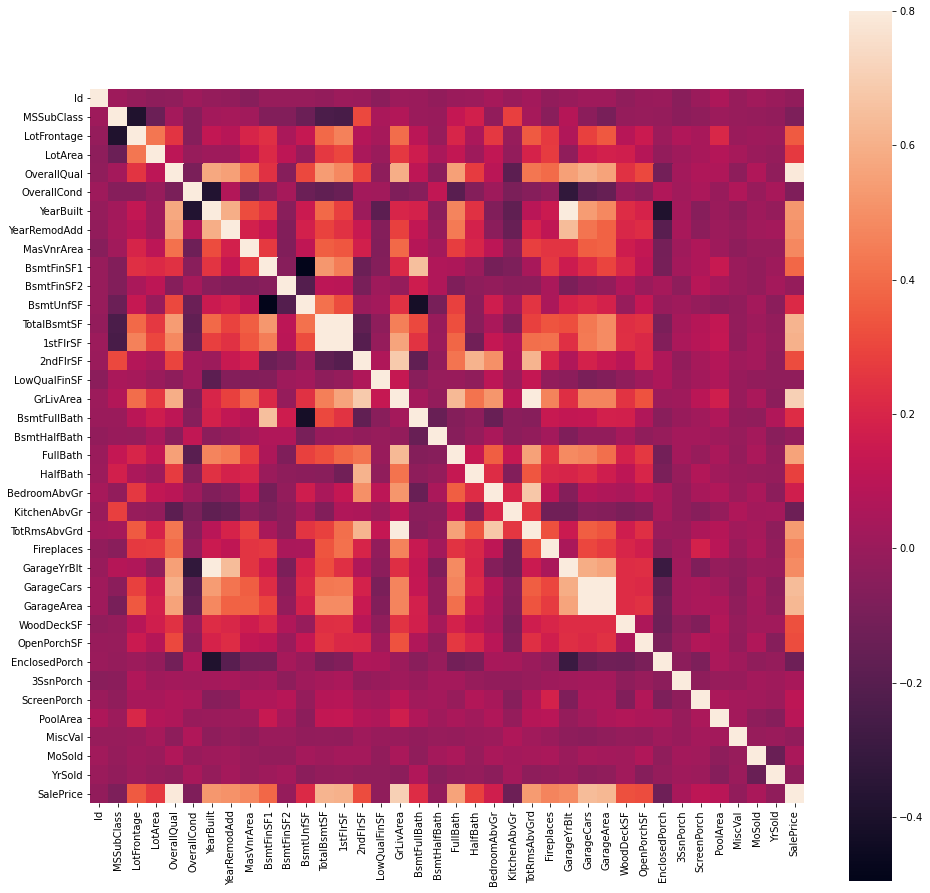

In [13]:
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

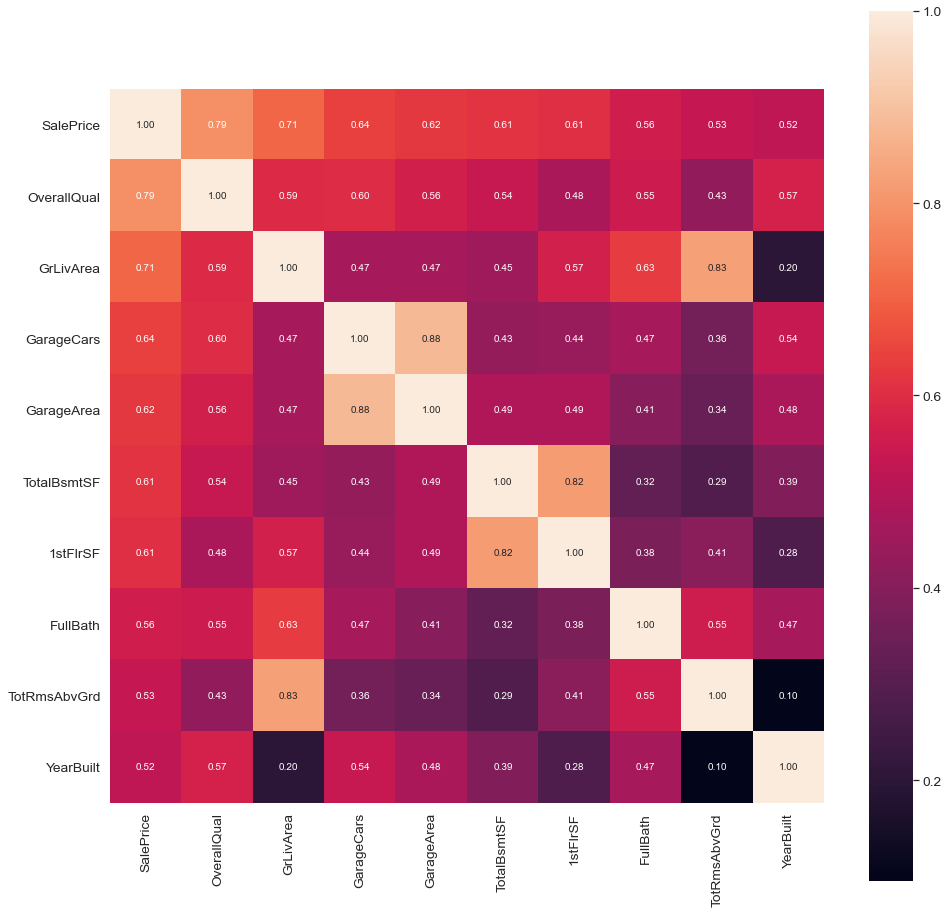

In [14]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [15]:
train = train[train.GrLivArea < 4500]  

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dropping columns with NULL values

In [17]:
total = test.isna().sum().sort_values(ascending=False)
# concatenate this data into dataframe
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456.0,0.995885
MiscFeature,1408.0,0.962963
Alley,1352.0,0.937586
Fence,1169.0,0.807270
FireplaceQu,730.0,0.473251
LotFrontage,227.0,0.177641
GarageYrBlt,78.0,0.055556
GarageQual,78.0,0.055556
GarageFinish,78.0,0.055556
GarageCond,78.0,0.055556


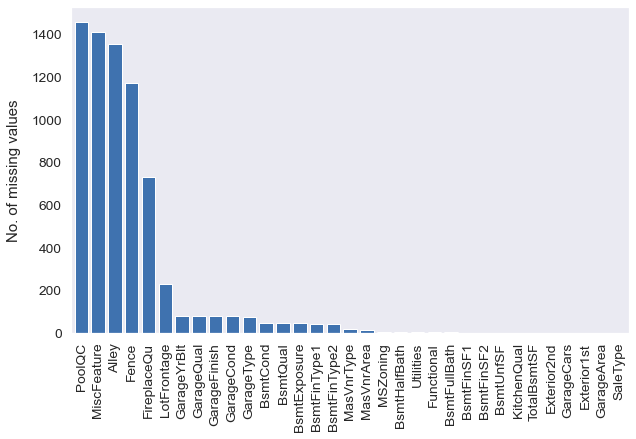

In [18]:
total = total[total > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(total.index, total.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(total) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [19]:
train = train.drop(missing_data[missing_data.Total > 0 ].index, axis=1)

In [20]:
y = train["SalePrice"]
X = train.drop(["Id","SalePrice"],axis=1)

In [21]:
te_Id = test['Id']
test.drop('Id',axis=1,inplace=True)
test.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


## Dummy Index

In [22]:
train_data = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
train_data.head(1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Electrical_SBrkr,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0


In [23]:
test_data = pd.get_dummies(test, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
test_data.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# Get missing columns in the training test
missing_cols = set( train_data.columns ) - set( test_data.columns )
print(len(missing_cols))

10


In [25]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[train_data.columns]

In [26]:
test_data.shape

(1459, 153)

## Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.33, random_state=27)

## Standardising Data

In [28]:
from sklearn.preprocessing import StandardScaler   # standardize features by removing the mean and scaling to unit variance.
scaler= StandardScaler()
#scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
te_X_scaled = scaler.fit_transform(test_data)

In [29]:
'''
# example of mutual information feature selection for numerical input data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k=100)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Note:- I used this one because RFE was taking a lot of time and is very slow for high dimensional data.
'''

"\n# example of mutual information feature selection for numerical input data\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import mutual_info_regression\nfrom matplotlib import pyplot\n \n# feature selection\ndef select_features(X_train, y_train, X_test):\n    # configure to select all features\n    fs = SelectKBest(score_func=mutual_info_regression, k=100)\n    # learn relationship from training data\n    fs.fit(X_train, y_train)\n    # transform train input data\n    X_train_fs = fs.transform(X_train)\n    # transform test input data\n    X_test_fs = fs.transform(X_test)\n    return X_train_fs, X_test_fs, fs\n \n# feature selection\nX_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled)\n# what are scores for the features\nfor i in range(len(fs.scores_)):\n    print('Feature %d: %f' % (i, fs.scores_[i]))\n# plot the scores\npyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)\npyplot.show()\n\n# Note:- I used t

In [30]:
# We are not using feature using selection because it didn't work well for our model.

In [31]:
'''k_features = 0
for i in fs.scores_:
    if i >= 0.005:
        k_features+=1
print('*'*100)
print(k_features)
X_train_fs.shape'''

"k_features = 0\nfor i in fs.scores_:\n    if i >= 0.005:\n        k_features+=1\nprint('*'*100)\nprint(k_features)\nX_train_fs.shape"

## Finding the right Model

In [32]:
import warnings
warnings.filterwarnings(action="ignore")
from lightgbm import LGBMRegressor as lgbm
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DT 
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBDT
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import AdaBoostRegressor as Ada
from xgboost import XGBRegressor as xgb
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge 

In [33]:
LR_params = []
DT_params = [{"criterion" : "squared_error"}, {"criterion" : "friedman_mse"},{"criterion":"absolute_error"},
             {"criterion" : "poisson"}]
#DT_params = [{"max_depth": 3, "min_samples_split": 5}]
RF_params = [{'n_estimators':1200,'max_depth':15,'min_samples_split':5,'min_samples_leaf':5,'max_features':None,
              'oob_score':True,'random_state':42}]
KNN_params = [{"n_neighbors":3}, {"n_neighbors":5}]
GNB_params = [{}]
#mult_naive_bayes_params = [{"alpha":0.1,"class_prior":[0.5,0.5]}]
SVR_params = [{"C":0.0001}, {"C":0.001}, {"C":0.01}, {"C":0.1}, {"C":1}, {"C":10},{'C': 20, 'epsilon': 0.008, 'gamma':0.0003}]
GBDT_params = [{'n_estimators':6000,'learning_rate':0.01,'max_depth':4,'max_features':'sqrt','min_samples_leaf':15,
                'min_samples_split':10,'loss':'huber','random_state':42}]
MLP_params = [{}]
Ada_params =[{}]
xgb_params = [{'learning_rate':0.01,'n_estimators':6000,'max_depth':4,'min_child_weight':0,'gamma':0.6,'subsample':0.7,
               'colsample_bytree':0.7,'objective':'reg:linear','nthread':-1,'scale_pos_weight':1,'seed':27,
               'reg_alpha':0.00006,'random_state':42}]
lgbm_params = [{'objective':'regression', 'num_leaves':6,'learning_rate':0.01, 'n_estimators':7000,'max_bin':200, 
                'bagging_fraction':0.8,'bagging_freq':4, 'bagging_seed':8,'feature_fraction':0.2,
                'feature_fraction_seed':8,'min_sum_hessian_in_leaf': 11,'verbose':-1,'random_state':42}]
ridge_params = [{'alpha':1e-15},{'alpha' :1e-10},{'alpha' : 1e-8},{'alpha': 9e-4},{'alpha': 7e-4},{'alpha': 5e-4},
                {'alpha':3e-4},{'alpha': 1e-4},{'alpha': 1e-3},{'alpha': 5e-2},{'alpha': 1e-2},{'alpha': 0.1},
                {'alpha':0.3},{'alpha': 1},{'alpha': 3},{'alpha': 5},{'alpha': 10},{'alpha':15},{'alpha': 18},
                {'alpha':20},{'alpha': 30},{'alpha': 50},{'alpha': 75},{'alpha': 100}]

In [34]:
models = [
    ["Logistic Regression", LR, LR_params],
    ["Decision Tree", DT, DT_params],
    ["Random Forest", RF, RF_params],
    ["k-neighbors", KNN, KNN_params],
    ["Gaussian Naive Bayes", GNB, GNB_params],
   # ["Multinomial Naive Bayes", MultinomialNB, mult_naive_bayes_params],
    ["Support Vector Machines", SVR, SVR_params],
    ["Gradient Boosting Decision Trees", GBDT, GBDT_params],
    ["MLP Classifier", MLP, MLP_params],
    ["AdaBoost Classifier",Ada,Ada_params],
    ["xgboost",xgb,xgb_params],
    ["lightGBM",lgbm,lgbm_params],
    ["Ridge Regressor",Ridge,ridge_params]
]

In [35]:
r2_scores = []
for model_name, Model, params in tqdm(models):
    #print(modelname, params_list)
    for param in params:
        model = Model(**param)
        model.fit(X_train_scaled, y_train)
        y_te_pred = model.predict(X_test_scaled)
        #mse_score = MSE(y_test,y_te_pred,multioutput='raw_values',squared=False)  
        RMSLE_score = np.log(np.sqrt(MSE(y_test,y_te_pred)))
       # r2_score = r2_score(y_test,y_te_pred,multioutput='raw_values')
        r2_scores.append((model_name, model, param, RMSLE_score))

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [01:10<00:26,  8.72s/it]

[09:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [01:39<00:29, 14.64s/it]

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:47<00:00,  8.95s/it]


In [36]:
r2_scores.sort(key=lambda x:x[-1], reverse=False)
for model_name, model, param, r2_score in r2_scores:
    print(model_name, param, r2_score)

xgboost {'learning_rate': 0.01, 'n_estimators': 6000, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 0.6, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:linear', 'nthread': -1, 'scale_pos_weight': 1, 'seed': 27, 'reg_alpha': 6e-05, 'random_state': 42} 10.056763907948495
lightGBM {'objective': 'regression', 'num_leaves': 6, 'learning_rate': 0.01, 'n_estimators': 7000, 'max_bin': 200, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'bagging_seed': 8, 'feature_fraction': 0.2, 'feature_fraction_seed': 8, 'min_sum_hessian_in_leaf': 11, 'verbose': -1, 'random_state': 42} 10.10646196570808
Gradient Boosting Decision Trees {'n_estimators': 6000, 'learning_rate': 0.01, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10, 'loss': 'huber', 'random_state': 42} 10.166968132819164
Random Forest {'n_estimators': 1200, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'oob_score': True, 'random_state': 42} 10.2679153102

## Final Model

### We are using XGBRegressor for our final model because it performed the best out of other models.

In [37]:
model = xgb(learning_rate=0.01, n_estimators=6000, max_depth=35, min_child_weight=0, gamma=0.6, subsample=0.4, 
            colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=6e-05, 
            random_state=42, verbosity=0)
model.fit(X_train_scaled, y_train)
# make a prediction for one example

y_te_pred = model.predict(X_test_scaled)
mse_score = MSE(y_test,y_te_pred,multioutput='raw_values',squared=False)
RMSLE_score = np.log(np.sqrt(MSE(y_test,y_te_pred)))

In [38]:
print(mse_score)
print(RMSLE_score)

[22165.76901966]
10.006304441802135


In [39]:
te_pred = model.predict(te_X_scaled)

In [40]:
pred = pd.DataFrame(te_Id, columns = ['Id'])

In [41]:
pred['SalePrice']=te_pred

In [42]:
pred.head()

,Id,SalePrice
0,1461,128309.429688
1,1462,159191.109375
2,1463,183703.843750
3,1464,193210.296875
4,1465,181432.500000


In [43]:
pred.to_csv('xgBoost_pred.csv',index=False)